# Quick Guide for Regression Tasks with Sklearn

### Imports

In [129]:
%pip install jupyterthemes xgboost hyperopt scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [130]:
from jupyterthemes import jtplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
%matplotlib inline

jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 

### Explorative Data Analysis

In [131]:
df = pd.read_csv('/Users/felixfautsch/VS_Python/heart_desease_detection/house_train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [132]:
df = df.drop(['Id'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [133]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [134]:
df.max

<bound method DataFrame.max of       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0           

<Axes: >

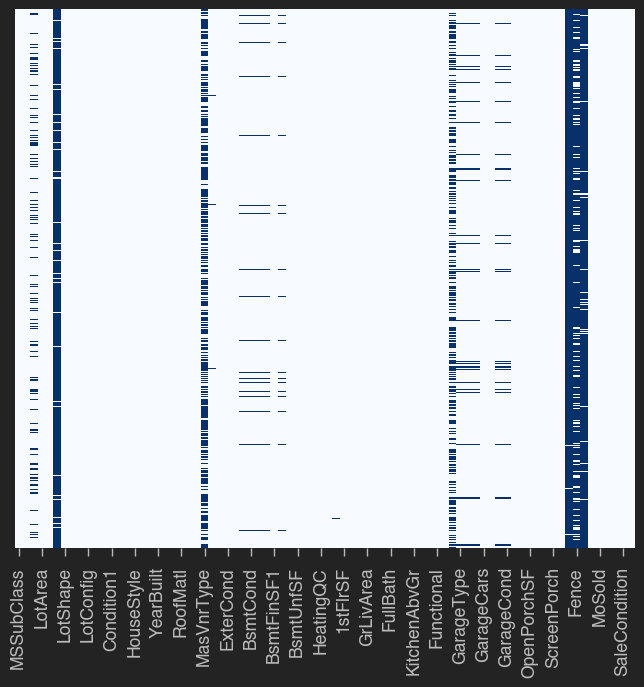

In [135]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [136]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

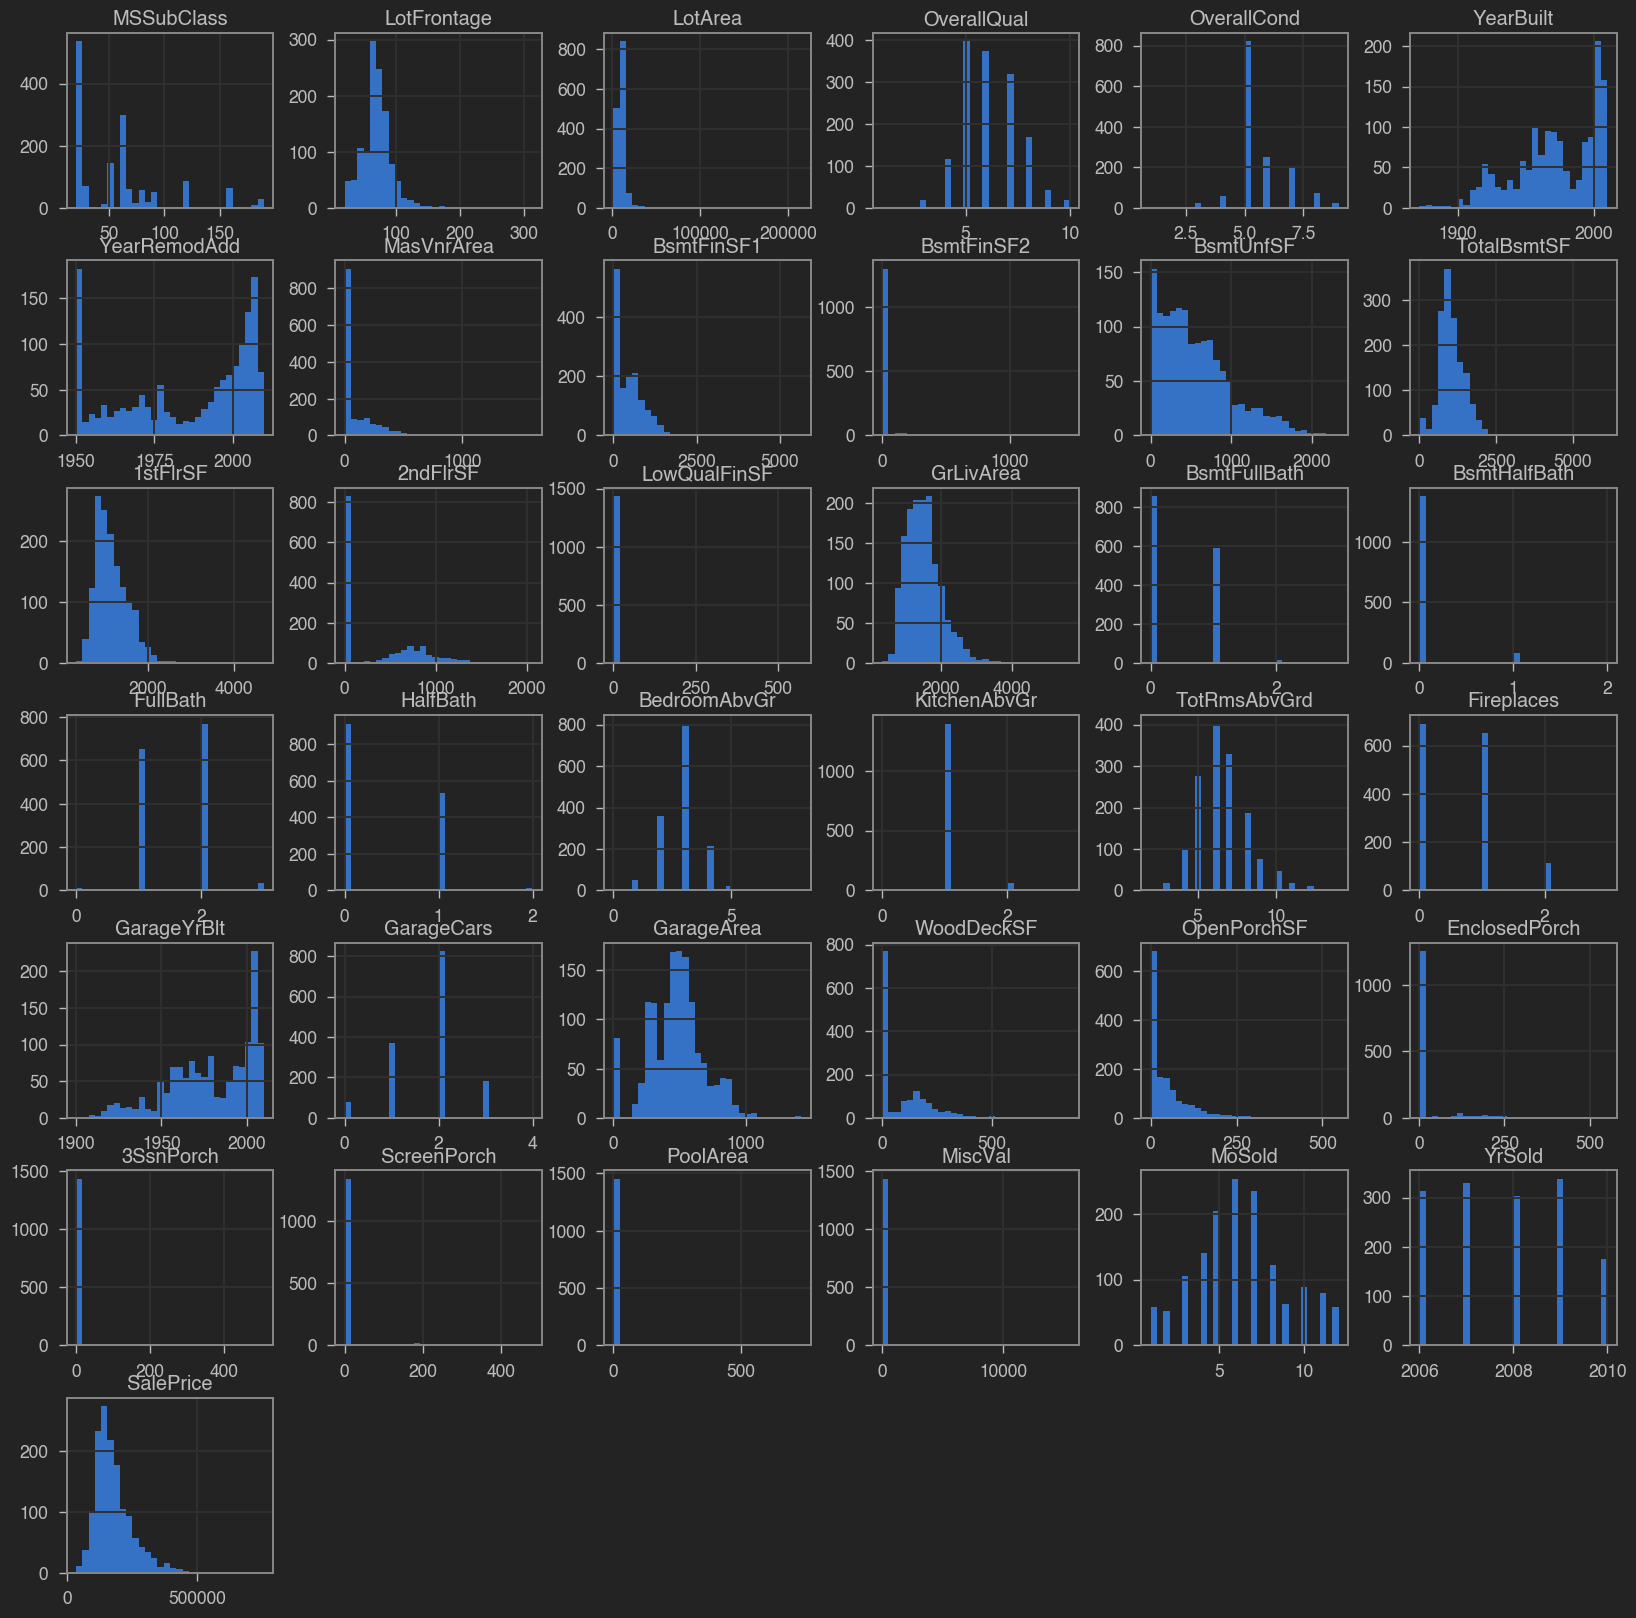

In [137]:
df.hist(bins = 30, figsize = (20, 20), color = 'b')
plt.show()

This will for the moment show a messy plot. only after some cleaning this will look good.

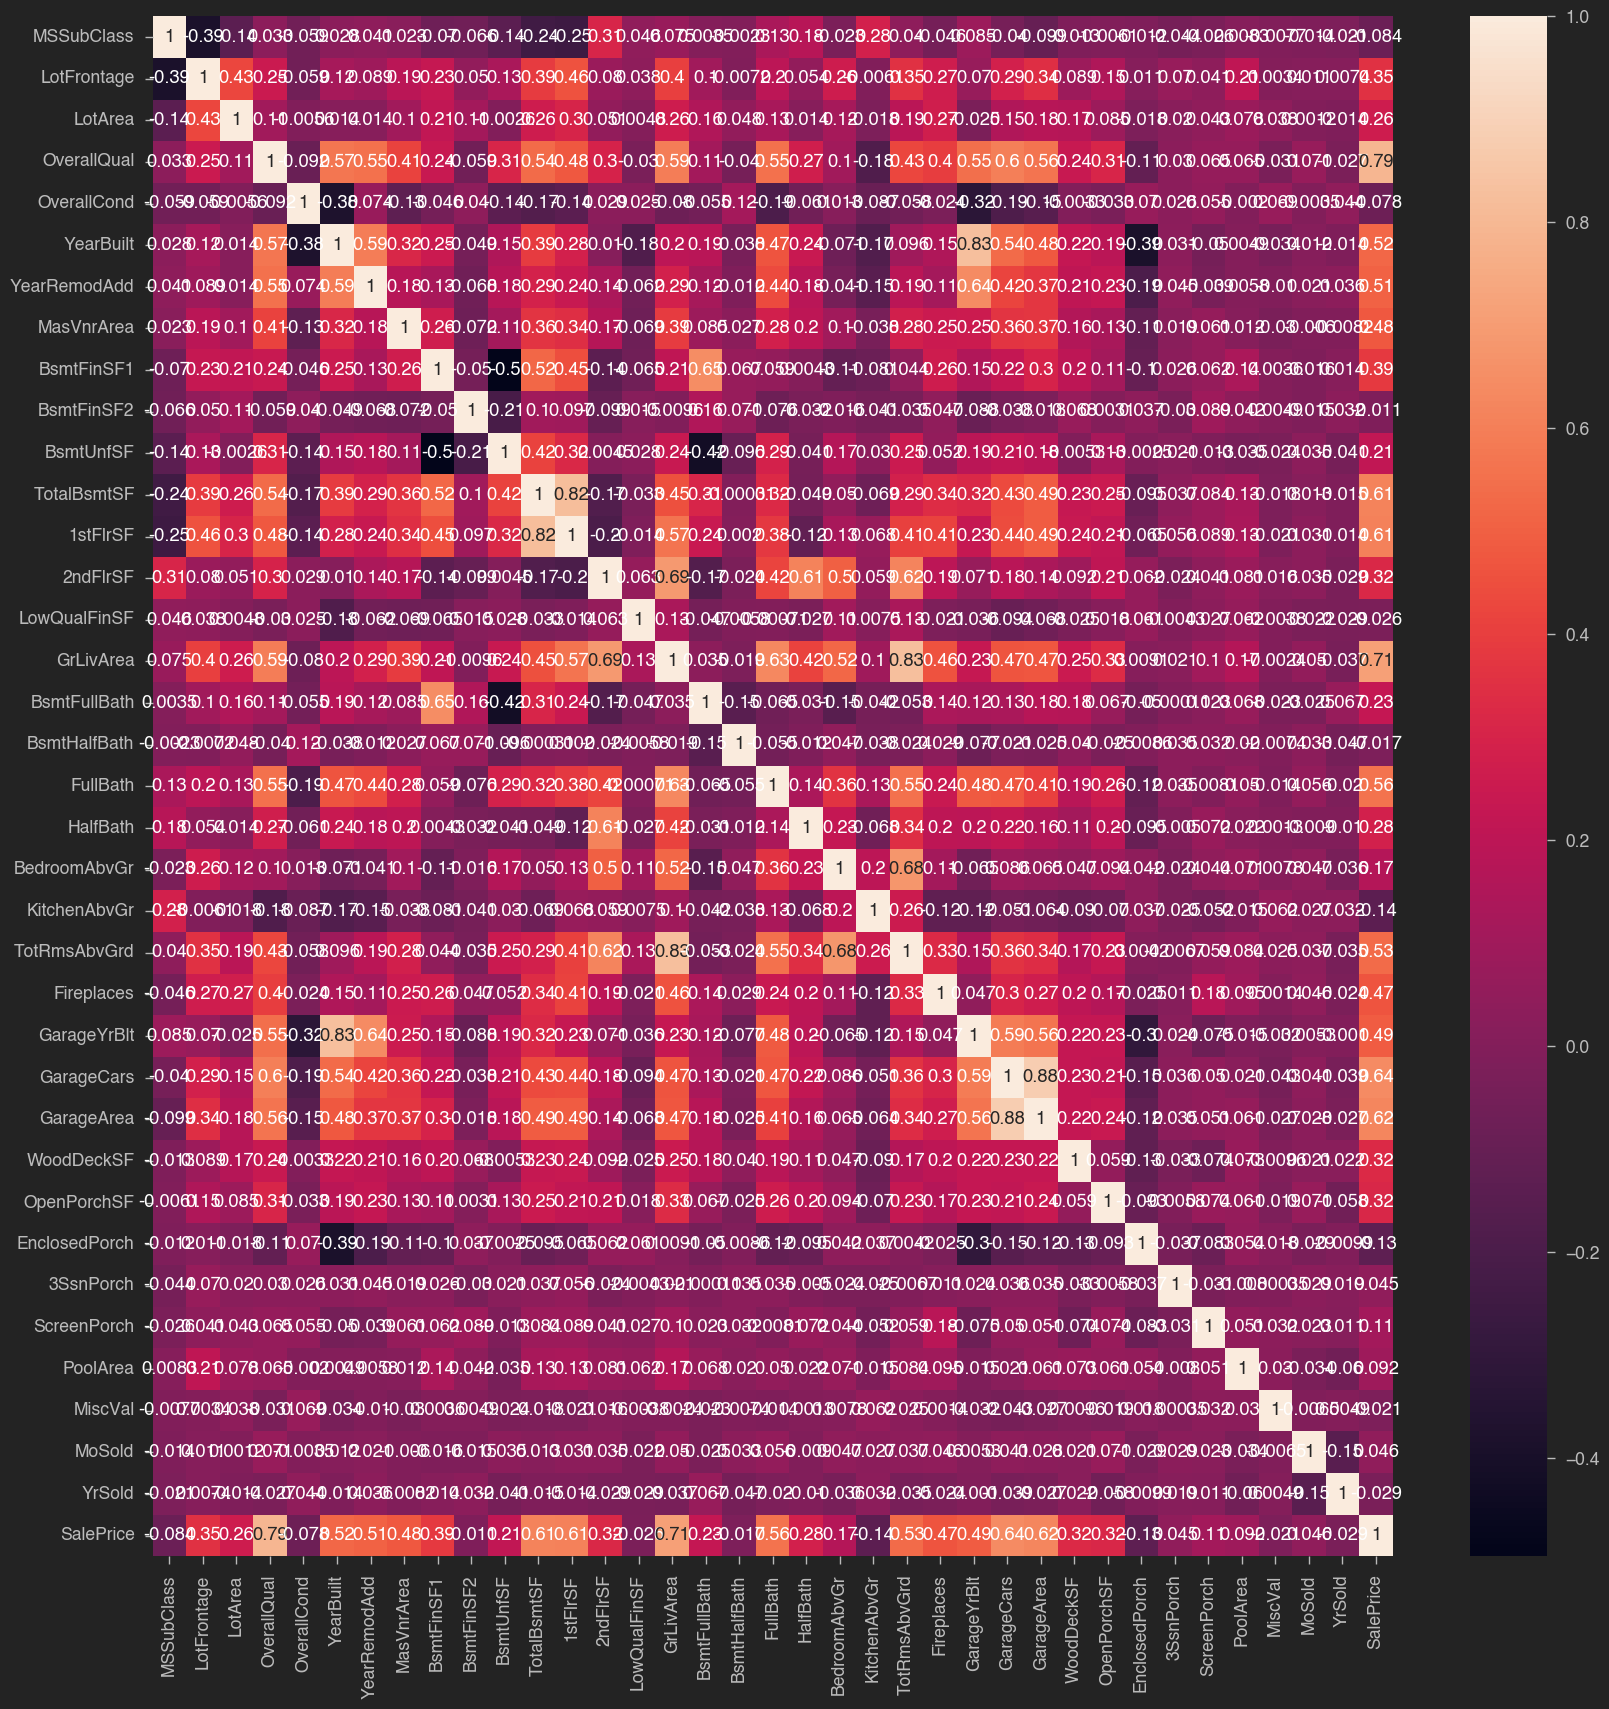

In [138]:
plt.figure(figsize = (20,20))
corr_matrix = df.select_dtypes(exclude=['object']).corr() # excluding categorical data 
sns.heatmap(corr_matrix, annot = True)
plt.show()

### Imputing the missing values for better ML performance

In [140]:
X = df.drop(columns = ['SalePrice'], axis=1)
y = df[['SalePrice']]

print(X.shape)
print(y.shape)

(1460, 79)
(1460, 1)


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)

(1022, 79)
(438, 79)


First we need to find all of the categorical data

In [142]:
categorical_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns
print(categorical_cols)
for col in categorical_cols:
    num_unique = X[col].nunique()
    print(f"Column '{col}': {num_unique} unique values")

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Column 'MSZoning': 5 unique values
Column 'Street': 2 unique values
Column 'Alley': 2 unique values
Column 'LotShape': 4 unique values
Column 'LandContour': 4 unique values
Column 'Utilities': 2 unique values
Column 'LotConfig': 5 unique values
Column 'LandSlope': 3 unique values
Column 'Neighborhood': 25 unique values
Column 'Condit

In [ ]:
num_imputer = SimpleImputer(strategy="median")
X_num_train = num_imputer.fit_transform(X_train[num_cols])
X_num_test = num_imputer.transform(X_test[num_cols])

cat_imputer = SimpleImputer(strategy="most_frequent")
X_cat_train = cat_imputer.fit_transform(X_train[categorical_cols])
X_cat_test = cat_imputer.transform(X_test[categorical_cols])

encoder = OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)

X_cat_train = encoder.fit_transform(X_cat_train)
X_cat_test = encoder.transform(X_cat_test)

/Users/felixfautsch/VS_Python/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [10, 13, 15, 29] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [144]:
X_train = np.hstack([X_num_train, X_cat_train])
X_test = np.hstack([X_num_test, X_cat_test])

print(X_train.shape)
print(X_test.shape)

(1022, 238)
(438, 238)


In [145]:
print("Any NaNs left in X:", np.isnan(X_train).any())
print("Number of NaNs:", np.isnan(X_train).sum())

Any NaNs left in X: False
Number of NaNs: 0


### Simple Linear Regression used for later Comparison between models

In [168]:
model = LinearRegression().fit(X_train,y_train)
score = model.score(X_test,y_test)
print(f"Accuracy: {score}")

Accuracy: 0.8158102203521415


### XGBoost Regression with bayesian hyperparameter optimization

In [159]:
search_space = {
    'max_depth': Integer(3, 30),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    "n_estimators":   Integer(250, 1000),
}

# Create XGBoost classifier
xgb_model = xgb.XGBRegressor(n_estimators=100, objective='reg:squarederror', random_state=42)

# Perform Bayesian optimization
bayes_search = BayesSearchCV(estimator=xgb_model, search_spaces=search_space, n_iter=30, cv=3, n_jobs=-1, verbose=2)
bayes_search.fit(X_train, y_train)

# Print best parameters
print(f"Best parameters: {bayes_search.best_params_}")
print(f"Best score: {bayes_search.best_score_}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END learning_rate=0.13748368115516704, max_depth=30, n_estimators=835; total time=  15.6s
[CV] END learning_rate=0.13748368115516704, max_depth=30, n_estimators=835; total time=  16.5s
[CV] END learning_rate=0.13748368115516704, max_depth=30, n_estimators=835; total time=  17.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END learning_rate=0.010157969215417355, max_depth=17, n_estimators=693; total time=  15.4s
[CV] END learning_rate=0.010157969215417355, max_depth=17, n_estimators=693; total time=  16.0s
[CV] END learning_rate=0.010157969215417355, max_depth=17, n_estimators=693; total time=  16.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END learning_rate=0.012320598463525567, max_depth=27, n_estimators=787; total time=  21.2s
[CV] END learning_rate=0.012320598463525567, max_depth=27, n_estimators=787; total time=  21.3s
[CV] END learning_rate=0.012320598463525567, max_depth=27,

In [169]:
result = bayes_search.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.8446653485298157


### Assess Metrics

In [171]:
y_predict = bayes_search.predict(X_test)
y_predict

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

y_test_log = np.log(y_test)
y_predict_log = np.log(y_predict)
RMSE_log = float(format(np.sqrt(mean_squared_error(y_test_log, y_predict_log)), '.3f')) # special metric for kaggle competition

print('RMSE =',RMSE, '\nRMSE_log =',RMSE_log, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 30849.676 
RMSE_log = 0.137 
MSE = 951702484.3935094 
MAE = 16248.057148972603 
R2 = 0.8446653485298157 
Adjusted R2 = 0.6588882276760274


### Visualizing the Prediction

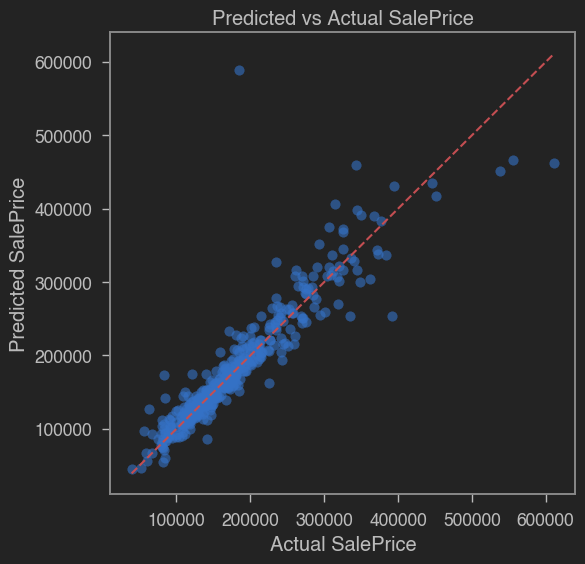

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_predict, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line (To visualize the variance to the actual values)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Predicted vs Actual SalePrice')
plt.show()

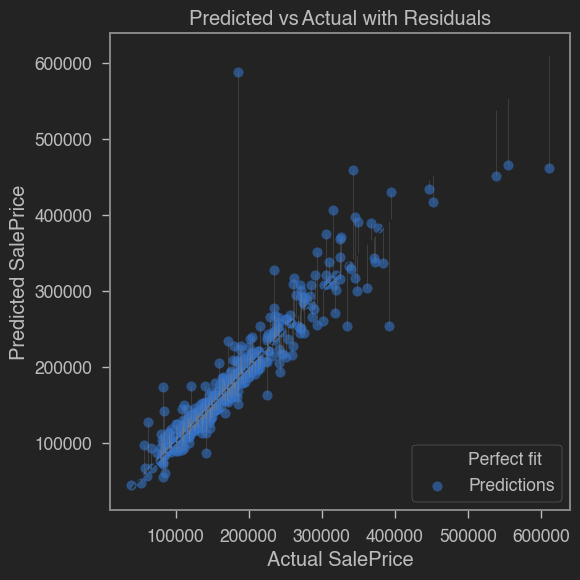

In [ ]:
y_test = y_test.squeeze()                        
y_pred  = pd.Series(y_predict, index=y_test.index)

residuals = y_test - y_pred
lims = [y_test.min(), y_test.max()]

plt.figure(figsize=(6, 6))
plt.plot(lims, lims, 'k--', linewidth=1, label='Perfect fit')
plt.scatter(y_test, y_pred, alpha=0.6, label='Predictions')

for actual, pred in zip(y_test, y_pred):
    plt.vlines(x=actual, ymin=pred, ymax=actual, colors='gray', alpha=0.4, linewidth=0.5)

plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Predicted vs Actual with Residuals')
plt.legend()
plt.tight_layout()
plt.show()